In [3]:
#!pip install fiona
import pandas as pd
import datetime as dt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.widgets import Slider
import numpy as np
import fiona
import shapely
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import networkx as nx
import pickle
from ipywidgets import interact, widgets

In [4]:
df = pd.read_csv('../data/censor_data.csv')
df.tail()

,Unnamed: 0,delta_p,pickup_date,pickup_cnt,pickup_time,dropoff_cnt,dropoff_time,cnt_delta,weekday,q,q1,censored,taxi_zone
159717,159717,1.0,2013-06-26,139.0,23:30:00,315.0,23:30:00,-176.0,1,0.0,1.0,0,263
159718,159718,1.0,2013-06-27,156.0,23:30:00,360.0,23:30:00,-204.0,1,0.0,0.0,0,263
159719,159719,1.0,2013-06-28,236.0,23:30:00,260.0,23:30:00,-24.0,1,0.0,9.0,1,263
159720,159720,1.0,2013-06-29,257.0,23:30:00,292.0,23:30:00,-35.0,0,1.0,5.0,0,263
159721,159721,2.0,2013-06-30,49.0,23:30:00,112.0,23:30:00,-63.0,0,3.0,3.0,0,263


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159722 entries, 0 to 159721
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    159722 non-null  int64  
 1   delta_p       159722 non-null  float64
 2   pickup_date   159722 non-null  object 
 3   pickup_cnt    159722 non-null  float64
 4   pickup_time   159722 non-null  object 
 5   dropoff_cnt   159722 non-null  float64
 6   dropoff_time  159722 non-null  object 
 7   cnt_delta     159722 non-null  float64
 8   weekday       159722 non-null  int64  
 9   q             159722 non-null  float64
 10  q1            159722 non-null  float64
 11  censored      159722 non-null  int64  
 12  taxi_zone     159722 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 15.8+ MB


In [6]:
pickup_time = "23:30:00" #dt.time(23,30,0)
p_date=pd.to_datetime("2013-06-30")
#df['pickup_time'] = pd.to_datetime(df['pickup_time'])

df['pickup_date'] = pd.to_datetime(df['pickup_date'])


df_temp = df.loc[ (df["pickup_date"]==p_date) & (df["pickup_time"]==pickup_time), :]
c_list = list(df_temp.loc[df_temp["censored"]==1,"taxi_zone"])
c_list

[17,
 49,
 50,
 54,
 62,
 82,
 116,
 134,
 140,
 146,
 151,
 166,
 188,
 189,
 198,
 209,
 223,
 232,
 244,
 257,
 262]

In [7]:
z_list = list(range(1,263))
c_list = list(range(1,260))
n_list = list(set(z_list)-set(c_list))
n_list

[260, 261, 262]

In [27]:
@widgets.interact(p_day=(1, 30))
#def matching_prob_t_grad(path='../data/', shp_file='../taxi_zones/taxi_zones.shp', pickup_time = "00:00:00", p_day =1 ):
def matching_prob_t_grad( p_day =1 ):
    shp_file='../taxi_zones/taxi_zones.shp'
    pickup_time = "00:00:00"
    #delta_t , t
    #df = pd.read_csv(path + f'matching_prob_{delta_t}_plot.csv') #(, 263)
    #df = pd.read_csv('../data/all_arr_prob.csv')
    #data = np.asarray(df)[t-1,:]
    #df_temp = df.loc[(df["pickup_time"]==pickup_time) & ( df["pickup_date"]==p_date), :]
    
    p_date=pd.to_datetime("2013-06-01") + dt.timedelta(days=p_day-1) 
    
    df_temp = df.loc[ (df["pickup_date"]==p_date) & (df["pickup_time"]==pickup_time), :]
    greater = [] # prob greater than 1
    equal = []
    smaller = [] # prob smaller than 1
    prob_0 = []
    dropoff_0 = []

    #max_color = max(data)
    #norm_red = mpl.colors.Normalize(1, vmax=max_color, clip=False)
    #norm_blue = mpl.colors.Normalize(min(data[data!=0]), vmax=1, clip=False)
    #mapper_red = mpl.cm.ScalarMappable(norm=norm_red, cmap=mpl.cm.Reds)
    #mapper_blue = mpl.cm.ScalarMappable(norm=norm_blue, cmap=mpl.cm.Blues_r)
    
    z_list = list(range(1,263))
    r_list = []
  
    c_list = list(df_temp.loc[df_temp["censored"]==1,"taxi_zone"])
    g_list = list(df_temp.loc[df_temp["censored"]==0,"taxi_zone"])
    r_list = c_list + g_list

    n_list = list(set(z_list)-set(r_list))
    
    for i in range(0,263): #(len(data)):
        greater.append(i+1)
        #if(df_temp)
        #if data[i] > 1:
            #greater.append(i+1)
        #elif data[i] == 1:
            #equal.append(i+1)
        #elif 0 < data[i] < 1:
            #smaller.append(i+1)
        #elif data[i] == 0:
            #prob_0.append(i+1)
        #else:
            #dropoff_0.append(i+1)


    G = nx.DiGraph()
    taxi_zones = fiona.open(shp_file)
    color_white = []
    color_red = []
    color_blue = []
    
    

    for i in range(len(taxi_zones)):
        zone = taxi_zones[i]
        i = int(zone['id']) + 1
        shape = shapely.geometry.asShape(zone['geometry'])
        center = shape.centroid.coords[0]
        G.add_node(i,pos=center) # add node with position
        #if ( i in c_list) :
            #color_red.append(mapper_red.to_rgba(i-1)
        #elif( i in g_list) :
            #color_blue.append(mapper_blue.to_rgba(i-1))
        #if (i in greater):
            #color_red.append(mapper_red.to_rgba(data[i-1]))
        #elif (i in equal):
            #color_white.append('white')
        #elif (i in smaller):
            #color_blue.append(mapper_blue.to_rgba(data[i-1]))

    p = nx.get_node_attributes(G,'pos')
    fig = plt.figure(3,figsize=(30,30)) 
    nx.draw_networkx_nodes(G, nodelist = c_list, pos=p, node_color='#fc5e78' , node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='prob > 1')
    nx.draw_networkx_nodes(G, nodelist = g_list, pos=p, node_color='#00b4d9' , node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='prob > 1')
    nx.draw_networkx_nodes(G, nodelist = n_list, pos=p, node_color='#f2e9cd' , node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='prob > 1')
    
    #nx.draw_networkx_nodes(G, nodelist = greater, pos=p, node_color='#00b4d9' , node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='prob > 1')
    nx.draw_networkx_nodes(G, nodelist = equal, pos=p, node_color=color_white, node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label = 'prob = 1')
    nx.draw_networkx_nodes(G, nodelist = smaller, pos=p, node_color=color_blue, node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='0 < porb < 1')
    nx.draw_networkx_nodes(G, nodelist = prob_0, pos=p, node_color='gray', node_size=500, alpha = 1, edgecolors = 'black', linewidths=1, label='porb = 0')
    nx.draw_networkx_nodes(G, nodelist = dropoff_0, pos=p, node_color='gray', node_size=500, alpha = 1, edgecolors = 'black', linewidths=4, label='no dropoff')
    nx.draw_networkx_labels(G, pos=p, font_size=10)


    #fig.suptitle(f'Matching Probability for Taxi Zones at t = {t}, delta_t = {delta_t}', fontsize=30, y=0.9)
    #plt.savefig('matching_prob_grad.png', bbox_inches = 'tight')
    #plt.legend()
    plt.show()
    
    #retunr(df_temp)

interactive(children=(IntSlider(value=1, description='p_day', max=30, min=1), Output()), _dom_classes=('widget…

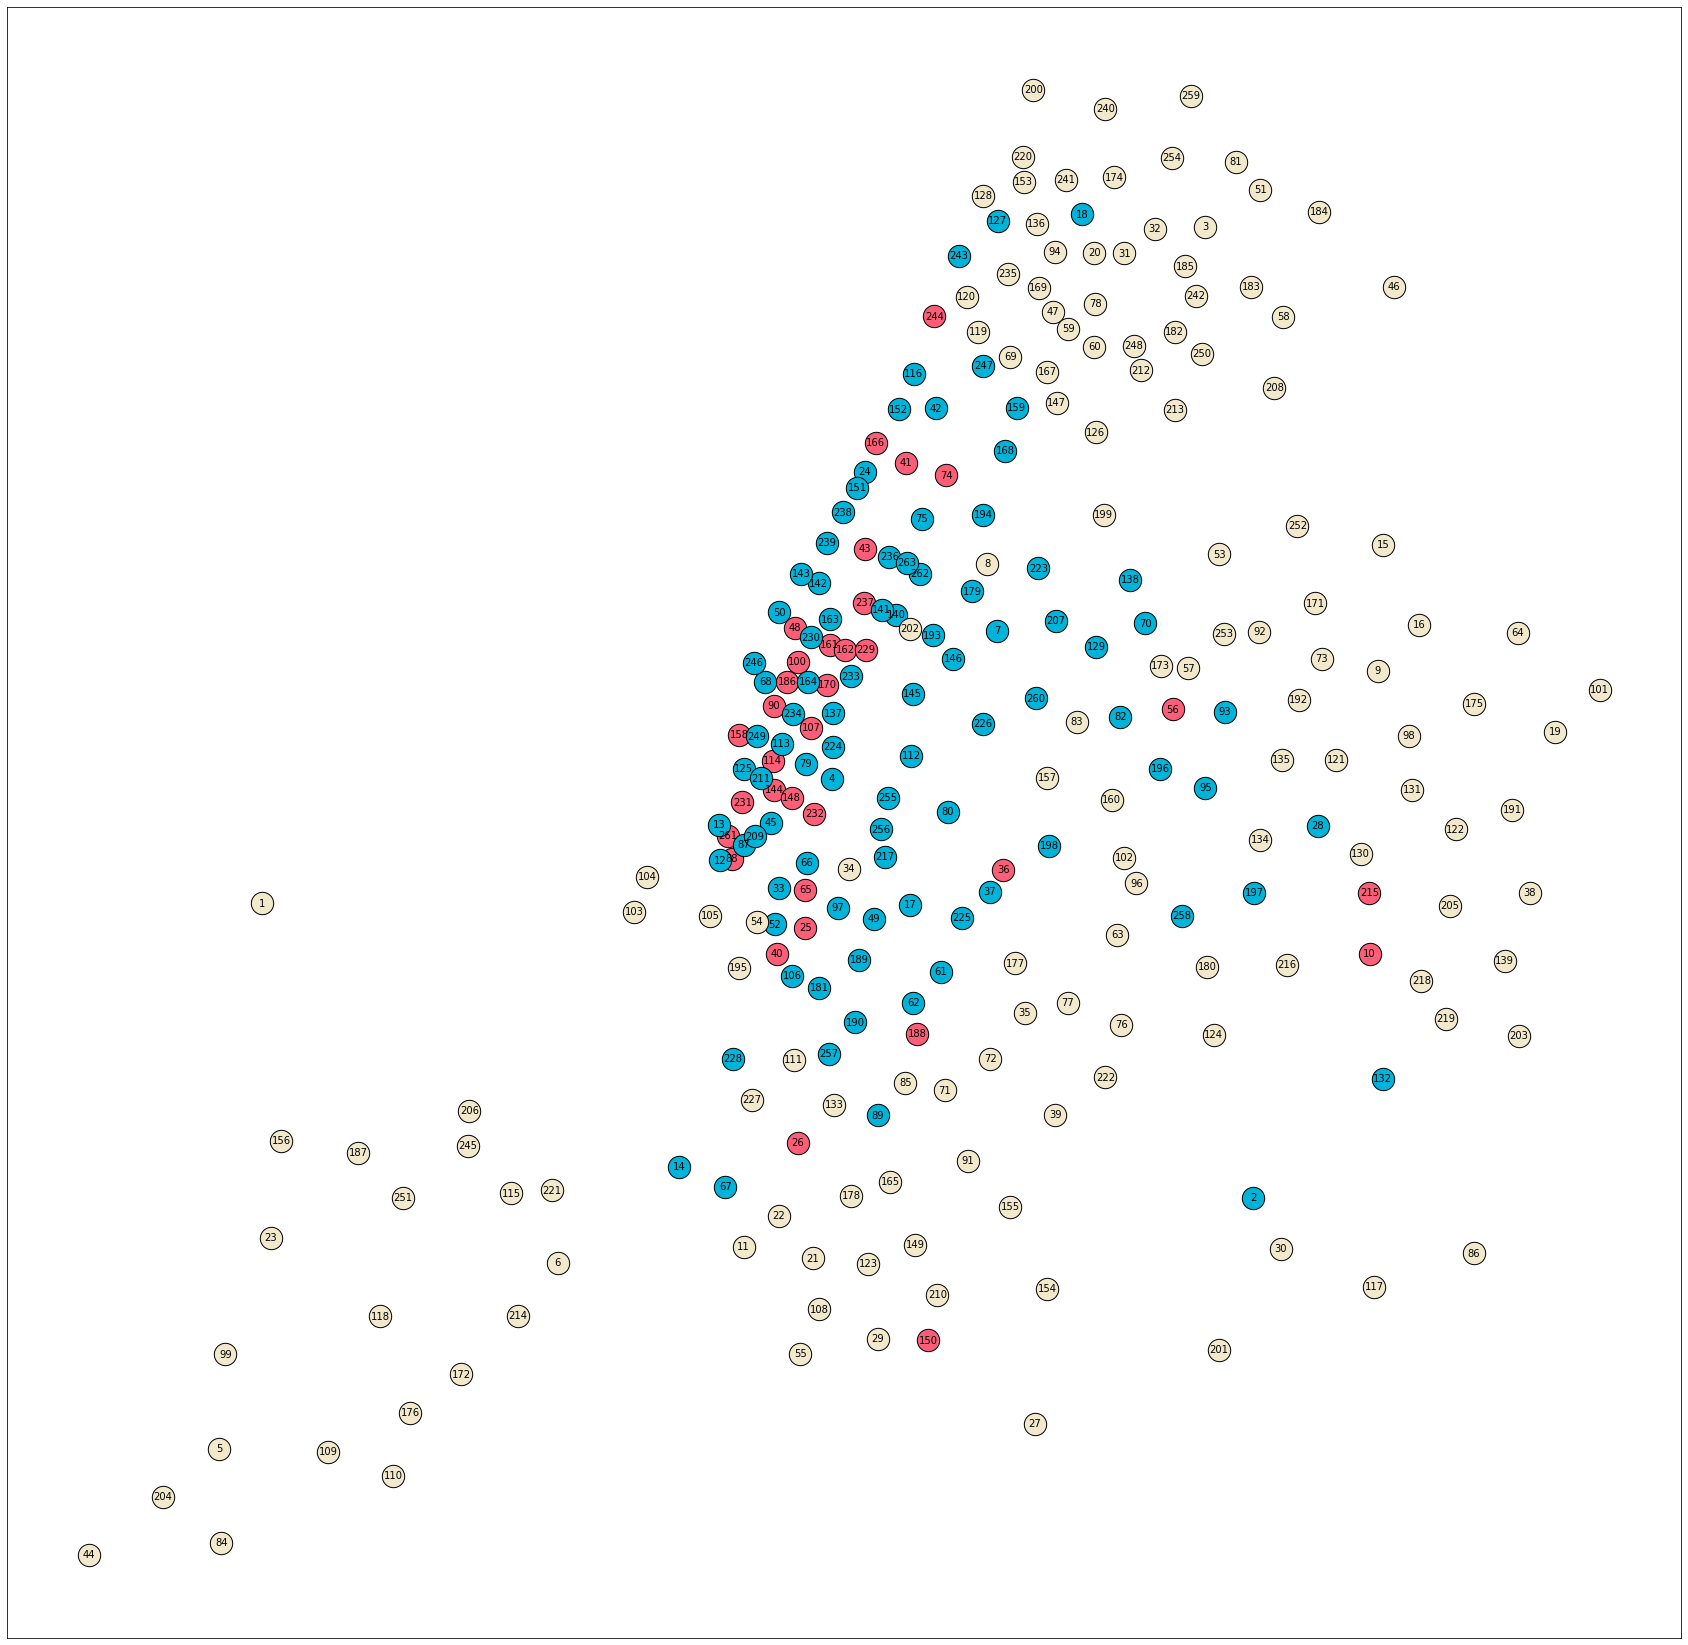

In [16]:
matching_prob_t_grad(path='', shp_file='../taxi_zones/taxi_zones.shp', pickup_time = "00:00:00", p_day = 5)

### Some trials from previous project, not working now, to fix soon 

In [10]:
!jupyter nbextension install --user --py widgetsnbextension

Installing /Users/anita/opt/anaconda3/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /Users/anita/Library/Jupyter/nbextensions/jupyter-js-widgets/extension.js.map
Up to date: /Users/anita/Library/Jupyter/nbextensions/jupyter-js-widgets/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --user --py
    


In [11]:
!jupyter nbextension enable --user --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [12]:
interact(matching_prob_t_grad, p_day=1)

interactive(children=(Text(value='../data/', description='path'), Text(value='../taxi_zones/taxi_zones.shp', d…

<function __main__.matching_prob_t_grad(path='../data/', shp_file='../taxi_zones/taxi_zones.shp', p_day=1)>

In [13]:
#def interactive_plot(delta_t_):
    #interact(matching_prob_t_grad, delta_t = widgets.RadioButtons(options=[delta_t_], value=delta_t_), t=widgets.IntSlider(min=0,max=int(1440/delta_t_-1),step=1,value=0))


In [14]:
#interactive_plot(10)